In [1]:
%matplotlib inline

import gdal
import rasterio
import matplotlib.pyplot as plt

In [7]:
cd BayAreaLandsat/

C:\Users\zstat\Documents\Python\GeoExperiments\BayAreaLandsat


In [42]:
RED_fn = 'LC08_L1TP_044034_20180329_20180405_01_T1_B4.TIF'

PROJCS["WGS 84 / UTM zone 10N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-123],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32610"]]
(462885.0, 30.0, 0.0, 4264215.0, 0.0, -30.0)


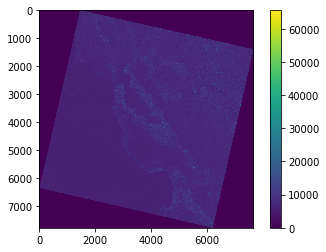

In [43]:
#inspecting a band with gdal
ds = gdal.Open(RED_fn)

#extract and plot the pixel values
pixel_values = ds.ReadAsArray()
plt.imshow(pixel_values)
plt.colorbar()

#print the geospatial projection Well-Known Text and the Affine Geotransform
print ds.GetProjection()
print ds.GetGeoTransform()

CRS({'init': u'epsg:32610'})
[462885.0, 30.0, 0.0, 4264215.0, 0.0, -30.0]
| 30.00, 0.00, 462885.00|
| 0.00,-30.00, 4264215.00|
| 0.00, 0.00, 1.00|


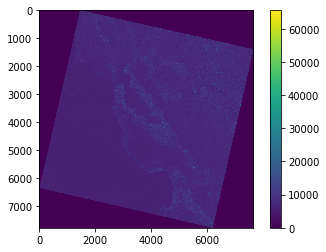

In [44]:
#inspecting a band with rasterio
with rasterio.open(RED_fn) as dem_raster:
    pixel_values = dem_raster.read(1) #band number
    plt.imshow(pixel_values)
    plt.colorbar()
    print dem_raster.crs #This is returned as a dict vrsion of the PROJ.4 format string
    print dem_raster.transform # returns the GDAL-style Affine Geotransform
    print dem_raster.affine # This is the Affine transformation object providing the same inforamtion as the GT